In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
train_full = pd.read_csv('https://raw.githubusercontent.com/NHANGIOI/Machine_Learning/refs/heads/main/Spaceship%20Titanic/train.csv')
x_test = pd.read_csv('https://raw.githubusercontent.com/NHANGIOI/Machine_Learning/refs/heads/main/Spaceship%20Titanic/test.csv')

train_full.drop(columns = 'Name',inplace = True)
x_test.drop(columns = 'Name',inplace = True)

x_train,x_valid,y_train,y_valid = train_test_split(train_full.copy().drop(columns = 'Transported'),train_full['Transported'],
                                                   train_size = 0.8,test_size = 0.2,random_state = 0)

In [ ]:
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import OneHotEncoder
from sklearn.impute import SimpleImputer
from sklearn.model_selection import cross_val_score
from sklearn.metrics import mean_absolute_error
from xgboost import XGBClassifier

numerical_cols = [col for col in x_train.columns if x_train[col].dtype in ['int','float']]
caterical_cols = [col for col in x_train.columns if x_train[col].dtype == 'object']

pre_processor = ColumnTransformer(transformers= [
    ('num_process',SimpleImputer(strategy = 'constant'),numerical_cols),
    ('cat_process',Pipeline(steps = [
        ('missing',SimpleImputer(strategy = 'most_frequent')),
        ('encode',OneHotEncoder(handle_unknown = 'ignore'))
    ]) 
    ,caterical_cols)
])
def run_model(n_estimators : int, output : bool):
    my_model = Pipeline(steps = [
        ('pre_process',pre_processor),
        ('model',XGBClassifier(n_estimators = n_estimators,
                               learning_rate = 0.05,
                               n_jobs = 4))
    ])
    my_model.fit(x_train,y_train)
    
    if(output == False):
        preds = my_model.predict(x_valid)
        MAE = mean_absolute_error(preds,y_valid)
        return MAE
    else:
        return my_model.predict(x_test)

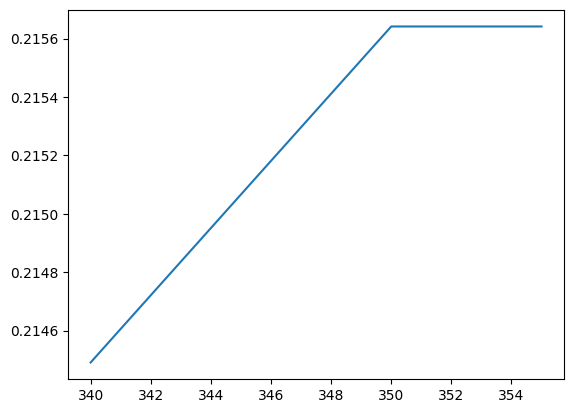

In [11]:
import matplotlib.pyplot as plt
list_scores = {}
for i in range(340,360,5):
    list_scores[i] = run_model(i,False)
%matplotlib inline

plt.plot(list(list_scores.keys()),list(list_scores.values()))
plt.show()

In [ ]:
output = pd.DataFrame({
    'PassengerId' : x_test['PassengerId'],
    'Transported' : run_model(340,True)
})
output.to_csv('submission.csv',index = False)